In [11]:
import psycopg2
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter



def connect():
    """ Connect to the PostgreSQL database server """
    conn = None
    try:
        # connect to the PostgreSQL server
        print('Connecting to the PostgreSQL database...')
        conn = psycopg2.connect(host = "localhost",
                                dbname = "job_dashboard",
                                user = "job",
                                password = "dashboard",
                                port = 5432)

    except Exception as inst:
            print("I am unable to connect to the database")
            print(inst)
    
    return conn


commands = (
    """
    CREATE TABLE IF NOT EXISTS offre_brute (
        id SERIAL PRIMARY KEY,
        ref VARCHAR(20),
        titre VARCHAR(50),
        entreprise VARCHAR(30),
        ville VARCHAR(40),
        departement VARCHAR(30),
        region VARCHAR(30),
        date_publication VARCHAR(30),
        date_maj VARCHAR(30),
        experience VARCHAR(50),
        salaire VARCHAR(50),
        type_contrat VARCHAR(20),
        intitule VARCHAR(30),
        diplome TEXT,
        secteur TEXT,
        site_origine VARCHAR(20),
        lien_site TEXT,
        corps TEXT
    )
    """
    ,
    """
    CREATE TABLE IF NOT EXISTS intitule (
        id SERIAL PRIMARY KEY,
        nom VARCHAR(30),
        alias VARCHAR(30)
    )
    """
    ,
    """
    CREATE TABLE IF NOT EXISTS secteur (
        id SERIAL PRIMARY KEY,
        libelle VARCHAR(30)
    )
    """
    ,
    """
    CREATE TABLE IF NOT EXISTS region (
        code_reg VARCHAR(3) PRIMARY KEY,
        nom VARCHAR(30)
    )
    """
    ,
    """
    CREATE TABLE IF NOT EXISTS departement (
        code_dep VARCHAR(3) PRIMARY KEY,
        nom VARCHAR(30),
        code_reg VARCHAR(3) REFERENCES region (code_reg)
    )
    """
    ,
    """
    CREATE TABLE IF NOT EXISTS ville (
        code_insee VARCHAR(5) PRIMARY KEY,
        nom VARCHAR(40),
        code_dep VARCHAR(3) REFERENCES departement (code_dep)
    )
    """
    ,
    """
    CREATE TABLE IF NOT EXISTS offre (
        id SERIAL PRIMARY KEY,
        ref VARCHAR(20),
        titre VARCHAR(50),
        entreprise VARCHAR(30),
        ville VARCHAR(5) REFERENCES ville (code_insee),
        departement VARCHAR(3) REFERENCES departement (code_dep),
        region VARCHAR(3) REFERENCES region (code_reg),
        date_publication DATE,
        date_maj DATE,
        exp_min INTEGER,
        exp_max INTEGER,
        salaire_min INTEGER,
        salaire_max INTEGER,
        type_contrat VARCHAR(20),
        intitule INTEGER REFERENCES intitule (id),
        diplome_min VARCHAR(30),
        diplome_max VARCHAR(30),
        site_origine VARCHAR(20),
        lien_site TEXT,
        corps TEXT
    )
    """
    ,
    """
    CREATE TABLE IF NOT EXISTS offre_secteur (
        id_secteur INTEGER REFERENCES secteur (id),
        id_offre INTEGER REFERENCES offre (id),
        CONSTRAINT PK_of_sec PRIMARY KEY (id_secteur, id_offre)
    )
    """
)


def query(conn,requete):
    """ Curseur """
    cur = conn.cursor()
    cur.execute(requete)


    
with connect() as conn:
    for command in commands:
        query(conn,command)

        conn.commit()


Connecting to the PostgreSQL database...


In [12]:
Requete = "Insert into offre(ref, titre, entreprise, ville, departement, region, date_publication, date_maj, exp_min, exp_max, salaire_min, salaire_max, type_contrat, intitule, diplome_min, diplome_max, site_origine, lien_site, corps) Values('A4', 'Ingénieur de Données', 'Alpes Cpy', '38185', '38', '084', '02/01/2019', '03/01/2019', 5, 10, 5000, 20000, 'CDD', 1, 'BAC+3', 'BAC+5', 'monster.fr', 'http://www.chercherduboulot.fr', 'Faut pas toucher');"
cur.execute(Requete)

Requete = "Insert into offre(ref, titre, entreprise, ville, departement, region, date_publication, date_maj, exp_min, exp_max, salaire_min, salaire_max, type_contrat, intitule, diplome_min, diplome_max, site_origine, lien_site, corps) Values('A5', 'Ingénieur de Data', 'Grenoble Société', '38185', '38', '084', '02/01/2019', '03/01/2019', 5, 10, 5000, 20000, 'CDD', 1, 'BAC+3', 'BAC+5', 'monster.fr', 'http://www.chercherduboulot.fr', 'Faut pas toucher');"
cur.execute(Requete)






InterfaceError: cursor already closed

No handles with labels found to put in legend.


Architecte BIG DATA
Ingénieur développement Web / Python - H/F
Ingénieur Développement Web / AngularJS - H/F
Ingénieur Développement Web/Php/Python - H/F
Ingénieur Développement Front-end - H/F
Développeur Informatique BackEnd (H/F)
ARCHITECTE APPLICATIF H/F
Développeur Front-End (Angular)
AI ENGINEER DATABASE H/F, Bordeaux
RUN MANAGER F/H
Data Analyst - Alternance-(H/F)
LEAD DATA ARCHITECT H/F
HEAD OF DATA H/F
Data miner H/F
Développeur Python (Django) avec appétence Data
Consultant Data Scientist (H/F)
Charge D'Analyse/Prevision Des Ventes (H/F)
Consultant Talend
Technical Leader Java (H/F)
Consultant DevOps, Cloud (H/F)
Consultant technique Big Data / Data Engineer Confirmé / Senior F/H
Consultant MS BI
Data Analyst H/F
CONSULTANT BI/BIG DATA (H/F)
Data DevOps - H/F
DATA ANALYST FRAUDE H/F
Chef de projet Data - H/F
Full-Stack Software Developer (M/F)
Ingénieur Etudes et Développement - Reconversion (44) H/F
CDI - Développeur PHP Fullstack H/F - IoT
Ingénieur Etudes et Développement 

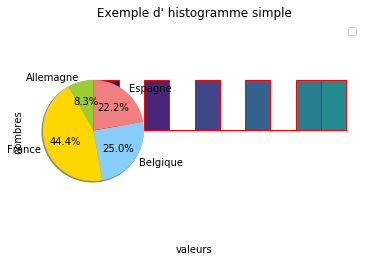

In [13]:
Requete = "Select titre From offre;"

cur = conn.cursor()
cur.execute(Requete)
rows = cur.fetchall()
couleurs = ['red']

valeur = []
labels = []
for row in rows:
    print(row[0])
    labels.append(row[0])

N, bins, patches = plt.hist(labels, range = (0, 5),
            edgecolor = 'red')

nbins = 20
colors = plt.get_cmap('viridis')(np.linspace(0, 1, nbins))
#n, bins, patches = plt.hist(labels, bins=nbins)

# apply the same color for each class to match the map
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)
    
    
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('Exemple d\' histogramme simple')
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')


plt.legend()

labels = 'Allemagne', 'France', 'Belgique', 'Espagne'
sizes = [15, 80, 45, 40]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')

plt.savefig('PieChart01.png')
plt.show()


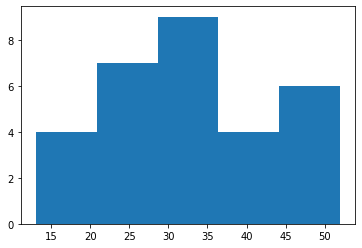

In [54]:
commute_times = [23, 25, 40, 35, 36, 47, 33, 28, 48, 34,
                 20, 37, 36, 23, 33, 36, 20, 27, 50, 34,
                 47, 18, 28, 52, 21, 44, 34, 13, 40, 49]

plt.hist(commute_times, 5)

plt.show()
